In [1]:
# Title: DMRG Ground State Search and Compression Algorithms
# Author: Aaron Sander
# Date: March-May 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of the Density Matrix Renormalization Group (DMRG)
# for the ground state search of a given Hamiltonian as an MPO as well as
# for compressing an arbitrary quantum state which has relevant applications
# in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [2]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
#import machine_learning as ML
import activation_functions as act

import ground_state_search as gnd

import neural_networks

import numpy as np
import math

# Ground State Search
This section looks for the ground state of the Ising Model with given parameters as accurately as a given threshold.

In [3]:
MPO = init.initialize_quantum_ising_MPO(num_sites=3, J=1, g=1)

Initial Energy: -0.8821832407363064
Energy: -2.8082454553136658 BondDim: 1
Energy: -3.054285827640537 BondDim: 1
Energy: -3.1327666157907497 BondDim: 1
Energy: -3.159481466889041 BondDim: 1
Energy: -3.1621525203187772 BondDim: 1
Energy: -3.1622732883926337 BondDim: 1
Energy: -3.493959207434935 BondDim: 2
Energy: -3.4939592074349335 BondDim: 2
Energy: -3.4939592074349335 BondDim: 2


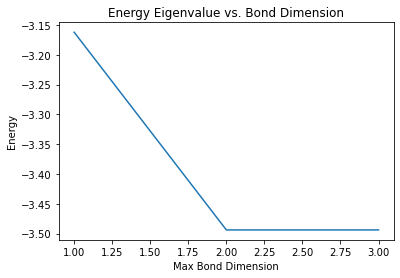

In [4]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression
This section converts an arbitrary n-bit string into an MPS and compresses it into one with a lower bond dimension.
The metrics used are cosine similarity (0 worst, 1 perfect), loss (1-cosSim), and Euclidean distance (-2 worst, 0 best)

In [6]:
data = init.initialize_random_normed_vector(length=4096)

In [7]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

Sim: 0.7484160637362877 Dist: 0.5015814353260221 BondDim: 1
Sim: 0.7518767221763888 Dist: 0.4981197424551774 BondDim: 2
Sim: 0.7564699491364573 Dist: 0.4934876400311765 BondDim: 3
Sim: 0.7623532554664086 Dist: 0.4874902507061984 BondDim: 4
Sim: 0.7704486675881999 Dist: 0.4791151556899469 BondDim: 5
Sim: 0.7788862076352433 Dist: 0.4702273836823575 BondDim: 6
Sim: 0.7890119712054068 Dist: 0.4593343322620172 BondDim: 7
Sim: 0.8019061819741506 Dist: 0.4450773169078024 BondDim: 8
Sim: 0.8108461112635954 Dist: 0.4349182552347108 BondDim: 9
Sim: 0.8196148598534971 Dist: 0.42471771819233795 BondDim: 10
Sim: 0.827110976606272 Dist: 0.415799258529554 BondDim: 11
Sim: 0.8375406798728383 Dist: 0.40306242708439405 BondDim: 12
Sim: 0.84579002787381 Dist: 0.3926957755390204 BondDim: 13
Sim: 0.8550570227701463 Dist: 0.3807137733650454 BondDim: 14
Sim: 0.863423902715019 Dist: 0.36956203442045554 BondDim: 15
Sim: 0.8726084210766939 Dist: 0.356919569263591 BondDim: 16
Sim: 0.8805414726947767 Dist: 0.3456

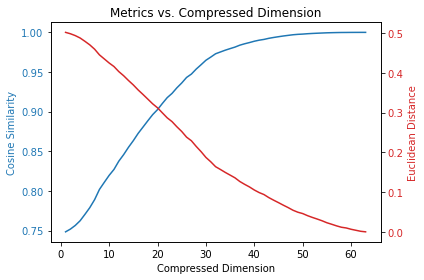

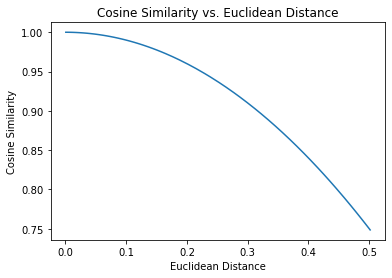

In [8]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=1)